In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

madrid = pd.read_csv("Madrid_database.csv",header=0)
print(madrid.head())
madrid['Date'] = pd.to_datetime(madrid['Date'])
print(madrid.dtypes)

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
0  08/09/2018            6        0           5        295.01    299.30   
1  09/09/2018            7        0           1        295.68    302.16   
2  10/09/2018            1        0           0        296.24    302.14   
3  11/09/2018            2        0           1        296.40    303.19   
4  12/09/2018            3        0           4        297.18    303.88   

   Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  ED_5  ED_6  \
0          2.56      3.96     101703.64              0.00281  ...  20.0  13.0   
1          1.26      3.03     101901.04              0.00012  ...  14.0  20.0   
2          2.44      3.57     102190.41              0.00014  ...  14.0  14.0   
3          2.36      3.57     102223.68              0.00139  ...  14.0  14.0   
4          1.39      2.95     102153.50              0.00001  ...  12.0  14.0   

   ED_7  Target_1  Target_2  Target_3  Target_4  Target_5  Tar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22104\2996657102.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


In [2]:
import pandas as pd

# Convert 'Date' to datetime
madrid['Date'] = pd.to_datetime(madrid['Date'])

# Sort the dataset by date in ascending order
madrid.sort_values(by='Date', inplace=True)

# Define lag function for creating lag features
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for i in range(1, lag_days + 1):
            data[f"{col}_lag_{i}"] = data[col].shift(i)
    return data

# Specify meteorological variables, categorical/calendrical context variables, and persistence-related variables
meteorological_vars = ['Average_Temp', 'Max_temp', 'Average_wind', 'Max_wind', 'Average_mslp', 'Total_precipitation']
context_vars = ['Day_of_week', 'Moon_Phase', 'Holiday']
persistence_vars = ['ED_1', 'ED_2', 'ED_3', 'ED_4', 'ED_5', 'ED_6', 'ED_7']

# Specify the lag days
lag_days = 3

# Create lag features for meteorological variables, context variables, and persistence variables
madrid = create_lag_features(madrid, meteorological_vars, lag_days)
madrid = create_lag_features(madrid, context_vars, lag_days)
madrid = create_lag_features(madrid, persistence_vars, lag_days)

# Drop rows with NaN values resulting from the lag operation
madrid.dropna(inplace=True)

# Display the updated dataset
print(madrid.head())

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
24 2018-02-10            2        0          52        290.96    299.67   
55 2018-02-11            5        0          37        285.74    291.42   
85 2018-02-12            7        0          32        280.05    284.88   
25 2018-03-10            3        0          41        292.89    301.29   
56 2018-03-11            6        0          27        282.90    289.19   

    Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  \
24          3.25      4.23     102182.90              0.00000  ...   
55          2.84      3.91     102124.09              0.00002  ...   
85          1.51      2.33     102529.60              0.00000  ...   
25          1.92      3.40     102161.96              0.00000  ...   
56          1.46      2.38     102147.65              0.00000  ...   

    ED_4_lag_3  ED_5_lag_1  ED_5_lag_2  ED_5_lag_3  ED_6_lag_1  ED_6_lag_2  \
24        24.0        24.0        28.0        23.0

In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X) 
# Now X_scaled contains the standardized features

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns))


      Day_of_week   Holiday  Moon_Phase  Average_Temp  Max_temp  Average_wind  \
0       -1.001102 -0.196805    0.057633      0.245571  0.526733      0.566229   
1        0.499026 -0.196805   -0.365856     -0.400037 -0.387001      0.204703   
2        1.499111 -0.196805   -0.507018     -1.103774 -1.111344     -0.968054   
3       -0.501060 -0.196805   -0.252925      0.484273  0.706157     -0.606528   
4        0.999068 -0.196805   -0.648181     -0.751287 -0.633987     -1.012143   
...           ...       ...         ...           ...       ...           ...   
1470    -0.001017 -0.196805    1.017540      0.748947  0.672931      0.257609   
1471     1.499111 -0.196805    1.271633      1.670361  1.706281      0.125343   
1472    -1.001102 -0.196805    1.328098      1.868248  1.828112     -0.659434   
1473     0.499026 -0.196805    1.412796      1.760647  1.740615     -0.412538   
1474    -1.501145 -0.196805    1.356330      1.260981  0.997445      0.151796   

      Max_wind  Average_msl

In [4]:
from sklearn.model_selection import train_test_split

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Determine the split index based on the temporal order (e.g., 70% train, 30% test)
split_index = int(0.7 * len(X_scaled))

# Split the data into training and testing sets
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the shapes of the training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)


Training set shapes: (1032, 65) (1032, 7)
Testing set shapes: (443, 65) (443, 7)


In [37]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings

target_columns = ['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for target_column in target_columns:
        # Step 1: Create a Linear Regression model
        linear_model = LinearRegression()

        # Step 2: Train the model
        y_train_target = y_train[target_column]
        linear_model.fit(X_train, y_train_target)

        # Step 3: Make predictions
        y_test_target = y_test[target_column]
        y_pred = linear_model.predict(X_test)

        # Step 4: Evaluate the model using Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test_target, y_pred)
        print(f"Mean Absolute Error (MAE) for {target_column}: {mae}")

        # Optional: Hyperparameter tuning for Linear Regression (Randomized Search)
        param_dist = {'fit_intercept': [True, False]}

        # Increase the number of iterations for better exploration of the search space
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        random_search = RandomizedSearchCV(LinearRegression(), param_distributions=param_dist, n_iter=100, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
        random_search.fit(X_train, y_train_target)

        best_linear_model = random_search.best_estimator_
        best_linear_params = random_search.best_params_

        # Step 5: Make predictions with the best model (if hyperparameter tuning is performed)
        y_pred_best = best_linear_model.predict(X_test)

        # Step 6: Evaluate the best model using Mean Absolute Error (MAE)
        print(f"Best {target_column} Model Parameters for Linear Regression:", best_linear_params)


Mean Absolute Error (MAE) for Target_1: 8.72997766101015
Best Target_1 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_2: 9.315976848741956
Best Target_2 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_3: 9.548094331002469
Best Target_3 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_4: 9.617375789044011
Best Target_4 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_5: 9.659690896624461
Best Target_5 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_6: 9.826388576442305
Best Target_6 Model Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error (MAE) for Target_7: 9.977814722133283
Best Target_7 Model Parameters for Linear Regression: {'fit_intercept': True}


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
import warnings

fcdnn_params = {
    'hidden_layer_sizes': [(neurons,) for neurons in np.arange(10, 201, 10)],
    'activation': ['relu', 'sigmoid'],  # Reduced options
    'max_iter': [100, 200],  # Reduced options
    'batch_size': [16, 32]  # Reduced options
}

target_columns = ['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Iterate over target columns and perform Randomized Search for each target
    for target_column in target_columns:
        # Define target column for this iteration
        y_train_target = y_train[target_column]
        y_test_target = y_test[target_column]

        # Perform Randomized Search for hyperparameter tuning
        fcdnn_search = RandomizedSearchCV(MLPRegressor(random_state=42), param_distributions=fcdnn_params, n_iter=10, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
        fcdnn_search.fit(X_train, y_train_target)
        
        # Get the best model and parameters
        best_fcdnn_model = fcdnn_search.best_estimator_
        best_fcdnn_params = fcdnn_search.best_params_

        # Train the best model
        best_fcdnn_model.fit(X_train, y_train_target)
        
        # Make predictions
        y_pred = best_fcdnn_model.predict(X_test)
        
        mae = mean_absolute_error(y_test_target, y_pred)
        print(f"Mean Absolute Error (MAE) for {target_column} using Fully Connected Deep Neural Network (FCDNN) with Hyperparameters: {mae}")
        print(f"Best Hyperparameters for {target_column} FCDNN Model:", best_fcdnn_params)


Mean Absolute Error (MAE) for Target_1 using Fully Connected Deep Neural Network (FCDNN) with Hyperparameters: 10.22647736568456
Best Hyperparameters for Target_1 FCDNN Model: {'max_iter': 100, 'hidden_layer_sizes': (160,), 'batch_size': 16, 'activation': 'relu'}
Mean Absolute Error (MAE) for Target_2 using Fully Connected Deep Neural Network (FCDNN) with Hyperparameters: 10.878797654167478
Best Hyperparameters for Target_2 FCDNN Model: {'max_iter': 100, 'hidden_layer_sizes': (160,), 'batch_size': 16, 'activation': 'relu'}
Mean Absolute Error (MAE) for Target_3 using Fully Connected Deep Neural Network (FCDNN) with Hyperparameters: 12.110027507361007
Best Hyperparameters for Target_3 FCDNN Model: {'max_iter': 200, 'hidden_layer_sizes': (110,), 'batch_size': 32, 'activation': 'relu'}
Mean Absolute Error (MAE) for Target_4 using Fully Connected Deep Neural Network (FCDNN) with Hyperparameters: 11.721440713084855
Best Hyperparameters for Target_4 FCDNN Model: {'max_iter': 100, 'hidden_lay

In [9]:
from sklearn.svm import SVR
svr_params = {
    'C': [10 ** i for i in range(0, 3)],  # [1, 10, 100]
    'kernel': ['linear', 'rbf'],
    'gamma': [10 ** i for i in range(-4, -1)],  # [0.0001, 0.001, 0.01]
    'epsilon': [i / 10 for i in range(0, 11)],  # [0.0, 0.1, ..., 1.0]
    'tol': [10 ** i for i in range(-4, -1)]  # [0.0001, 0.001, 0.01]
}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Iterate over target columns and perform Randomized Search for each target
    for target_column in target_columns:
        # Define target column for this iteration
        y_train_target = y_train[target_column]
        y_test_target = y_test[target_column]

        # Perform Randomized Search for hyperparameter tuning
        svr_search = RandomizedSearchCV(SVR(), param_distributions=svr_params, n_iter=100, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
        svr_search.fit(X_train, y_train_target)
        
        # Get the best model and parameters
        best_svr_model = svr_search.best_estimator_
        best_svr_params = svr_search.best_params_

        # Train the best model
        best_svr_model.fit(X_train, y_train_target)
        
        # Make predictions
        y_pred = best_svr_model.predict(X_test)
        
        mae = mean_absolute_error(y_test_target, y_pred)
        print(f"Mean Absolute Error (MAE) for {target_column} using Support Vector Regression (SVR) with Hyperparameters: {mae}")
        print(f"Best Hyperparameters for {target_column} SVR Model:", best_svr_params)

Mean Absolute Error (MAE) for Target_1 using Support Vector Regression (SVR) with Hyperparameters: 8.725063976095413
Best Hyperparameters for Target_1 SVR Model: {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 1.0, 'C': 100}
Mean Absolute Error (MAE) for Target_2 using Support Vector Regression (SVR) with Hyperparameters: 9.645720090228094
Best Hyperparameters for Target_2 SVR Model: {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 1.0, 'C': 100}
Mean Absolute Error (MAE) for Target_3 using Support Vector Regression (SVR) with Hyperparameters: 9.671469894723511
Best Hyperparameters for Target_3 SVR Model: {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 1.0, 'C': 100}
Mean Absolute Error (MAE) for Target_4 using Support Vector Regression (SVR) with Hyperparameters: 9.806909432627858
Best Hyperparameters for Target_4 SVR Model: {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 1.0, 'C': 100}
Mean Absolute Error (MAE) for Target_5 using Support

In [10]:
from sklearn.ensemble import RandomForestRegressor
forest_params = {
    'max_depth': range(1, 21),
    'min_samples_leaf': range(1, 21),
    'criterion': ['mae', 'mse', 'friedman_mse'],
    'n_estimators': range(1, 501),
    'max_features': range(2, 22),
    'bootstrap': [True, False]
}
target_columns = ['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Iterate over target columns and perform Randomized Search for each target
    for target_column in target_columns:
        # Perform Randomized Search for hyperparameter tuning
        forest_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=
                                           forest_params, n_iter=100, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
        forest_search.fit(X_train, y_train[target_column])
        
        # Get the best model and parameters
        best_forest_model = forest_search.best_estimator_
        best_forest_params = forest_search.best_params_

        # Train the best model
        best_forest_model.fit(X_train, y_train[target_column])
        
        # Make predictions
        y_pred = best_forest_model.predict(X_test)
        
        mae = mean_absolute_error(y_test[target_column], y_pred)
        print(f"Mean Absolute Error (MAE) for {target_column} using Random Forest with Hyperparameters: {mae}")
        print(f"Best Hyperparameters for {target_column} Random Forest Model:", best_forest_params)

Mean Absolute Error (MAE) for Target_1 using Random Forest with Hyperparameters: 10.941694681351033
Best Hyperparameters for Target_1 Random Forest Model: {'n_estimators': 367, 'min_samples_leaf': 5, 'max_features': 21, 'max_depth': 17, 'criterion': 'friedman_mse', 'bootstrap': True}
Mean Absolute Error (MAE) for Target_2 using Random Forest with Hyperparameters: 11.45216619611435
Best Hyperparameters for Target_2 Random Forest Model: {'n_estimators': 367, 'min_samples_leaf': 5, 'max_features': 21, 'max_depth': 17, 'criterion': 'friedman_mse', 'bootstrap': True}
Mean Absolute Error (MAE) for Target_3 using Random Forest with Hyperparameters: 11.270830566557217
Best Hyperparameters for Target_3 Random Forest Model: {'n_estimators': 367, 'min_samples_leaf': 5, 'max_features': 21, 'max_depth': 17, 'criterion': 'friedman_mse', 'bootstrap': True}
Mean Absolute Error (MAE) for Target_4 using Random Forest with Hyperparameters: 11.042343804215323
Best Hyperparameters for Target_4 Random Fores

In [44]:
from sklearn.metrics import mean_absolute_error

class ELMRegressor:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden

    def fit(self, X, y):
        # Initialize input weights and biases using Xavier initialization
        limit = np.sqrt(6 / (input_dim + self.n_hidden))
        self.input_weights_ = np.random.uniform(-limit, limit, (input_dim, self.n_hidden))
        self.hidden_biases_ = np.random.uniform(-limit, limit, self.n_hidden)

        # Calculate hidden layer output
        H = np.maximum(0, np.dot(X, self.input_weights_) + self.hidden_biases_)

        # Calculate output weights using Moore-Penrose pseudoinverse
        self.output_weights_ = np.linalg.pinv(H) @ y

    def predict(self, X):
        # Calculate hidden layer output
        H = np.maximum(0, np.dot(X, self.input_weights_) + self.hidden_biases_)

        # Predict output
        y_pred = np.dot(H, self.output_weights_)
        return y_pred

# Initialize ELMRegressor with the number of features in X_train
elm_model = ELMRegressor(n_hidden=X_train.shape[1])

# Assuming X_train and y_train are your training data
elm_model.fit(X_train, y_train)

# List to store MAE values for each target
mae_values = []

# Iterate over each target column
for target_column in y_train.columns:
    # Fit the model
    elm_model.fit(X_train, y_train[target_column])

    # Make predictions
    y_pred = elm_model.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test[target_column], y_pred)
    
    # Append MAE value to the list
    mae_values.append(mae)

for i, mae in enumerate(mae_values, start=1):
    print(f"Mean Absolute Error (MAE) for Target_{i} using ELM with Hyperparameters: {mae}")

Mean Absolute Error (MAE) for Target_1 using ELM with Hyperparameters: 14.345299495923854
Mean Absolute Error (MAE) for Target_2 using ELM with Hyperparameters: 14.389128046242098
Mean Absolute Error (MAE) for Target_3 using ELM with Hyperparameters: 14.635039311461446
Mean Absolute Error (MAE) for Target_4 using ELM with Hyperparameters: 14.235765680951227
Mean Absolute Error (MAE) for Target_5 using ELM with Hyperparameters: 15.528643771318798
Mean Absolute Error (MAE) for Target_6 using ELM with Hyperparameters: 15.053276816457736
Mean Absolute Error (MAE) for Target_7 using ELM with Hyperparameters: 15.028986446607755


In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_params = {
    'max_depth': range(1, 21),
    'min_samples_leaf': range(1, 21),
    'criterion': ['mae', 'mse', 'friedman_mse'],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0]
}
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

target_columns = ['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for target_column in target_columns:
        # Perform Randomized Search for hyperparameter tuning
        tree_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=tree_params
                                         , n_iter=100, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
        tree_search.fit(X_train, y_train[target_column])
        
        # Get the best model and parameters
        best_tree_model = tree_search.best_estimator_
        best_tree_params = tree_search.best_params_

        # Train the best model
        best_tree_model.fit(X_train, y_train[target_column])
        
        # Make predictions
        y_pred = best_tree_model.predict(X_test)
        
        mae = mean_absolute_error(y_test[target_column], y_pred)
        print(f"Mean Absolute Error (MAE) for {target_column} using Regression Tree with Hyperparameters: {mae}")
        print(f"Best Hyperparameters for {target_column} Regression Tree Model:", best_tree_params)

Mean Absolute Error (MAE) for Target_1 using Regression Tree with Hyperparameters: 11.064404941859879
Best Hyperparameters for Target_1 Regression Tree Model: {'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_depth': 5, 'criterion': 'friedman_mse'}
Mean Absolute Error (MAE) for Target_2 using Regression Tree with Hyperparameters: 11.367473039402702
Best Hyperparameters for Target_2 Regression Tree Model: {'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_depth': 5, 'criterion': 'friedman_mse'}
Mean Absolute Error (MAE) for Target_3 using Regression Tree with Hyperparameters: 12.804173150440388
Best Hyperparameters for Target_3 Regression Tree Model: {'min_weight_fraction_leaf': 0, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 4, 'criterion': 'friedman_mse'}
Mean Absolute Error (MAE) for Target_4 using Regression Tree with Hyperparameters: 12.171707400366758
Best Hyperparameters for Target_4 Regression Tr

In [45]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.73, 9.32, 9.55, 9.62, 9.66, 9.83, 9.98]
mae_fcdnn = [10.23, 10.88, 12.11, 11.72, 12.19, 12.08, 12.53]
mae_svr = [8.73, 9.65, 9.67, 9.81, 9.80, 9.78, 9.99]
mae_rf = [10.94, 11.45, 11.27, 11.04, 10.60, 10.75, 10.75]
mae_rt = [11.06, 11.37, 12.80, 12.17, 12.25, 12.62, 12.16]
mae_elm = [14.35, 14.39, 14.64, 14.24, 15.53, 15.05, 15.03]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Days': 'Average',
    'LR': round(sum(mae_lr) / len(mae_lr), 3),
    'RT': round(sum(mae_rt) / len(mae_rt), 3),
    'RF': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append the averages as a new row

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)


# Display the DataFrame as a formatted table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+---------+-------+--------+--------+-------+--------+--------+
|  Days   |  LR   |   RT   |   RF   |  SVR  |  ELM   | FCDNN  |
+---------+-------+--------+--------+-------+--------+--------+
| +1 day  | 8.73  | 11.06  | 10.94  | 8.73  | 14.35  | 10.23  |
| +2 days | 9.32  | 11.37  | 11.45  | 9.65  | 14.39  | 10.88  |
| +3 days | 9.55  |  12.8  | 11.27  | 9.67  | 14.64  | 12.11  |
| +4 days | 9.62  | 12.17  | 11.04  | 9.81  | 14.24  | 11.72  |
| +5 days | 9.66  | 12.25  |  10.6  |  9.8  | 15.53  | 12.19  |
| +6 days | 9.83  | 12.62  | 10.75  | 9.78  | 15.05  | 12.08  |
| +7 days | 9.98  | 12.16  | 10.75  | 9.99  | 15.03  | 12.53  |
|         |       |        |        |       |        |        |
| Average | 9.527 | 12.061 | 10.971 | 9.633 | 14.747 | 11.677 |
+---------+-------+--------+--------+-------+--------+--------+


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16524\665942702.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16524\665942702.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(averages, ignore_index=True)


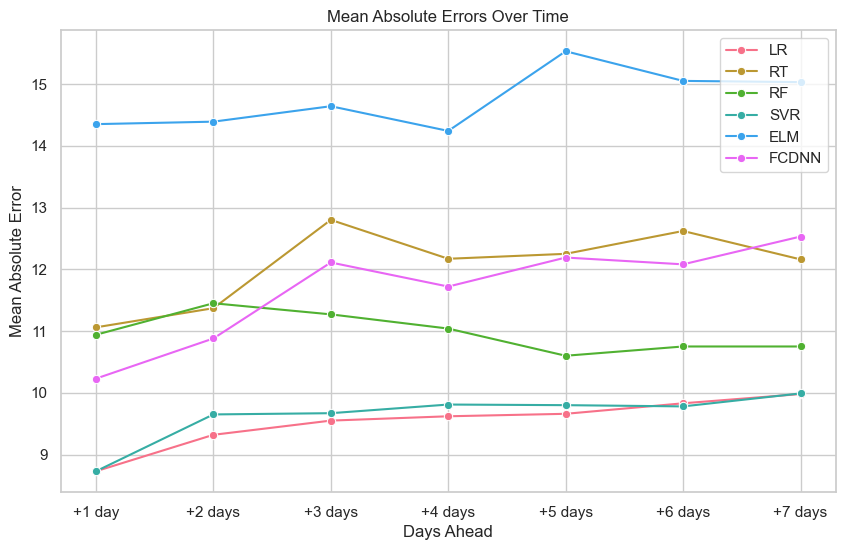

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.73, 9.32, 9.55, 9.62, 9.66, 9.83, 9.98]
mae_fcdnn = [10.23, 10.88, 12.11, 11.72, 12.19, 12.08, 12.53]
mae_svr = [8.73, 9.65, 9.67, 9.81, 9.80, 9.78, 9.99]
mae_rf = [10.94, 11.45, 11.27, 11.04, 10.60, 10.75, 10.75]
mae_rt = [11.06, 11.37, 12.80, 12.17, 12.25, 12.62, 12.16]
mae_elm = [14.35, 14.39, 14.64, 14.24, 15.53, 15.05, 15.03]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}
df = pd.DataFrame(data)

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df.columns) - 1)  # Adjust the color palette as needed

for i, model in enumerate(df.columns[1:]):
    sns.lineplot(x='Days', y=model, data=df, label=model, marker='o', color=palette[i])

plt.title('Mean Absolute Errors Over Time')
plt.xlabel('Days Ahead')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16524\873042638.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16524\873042638.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(averages, ignore_index=True)


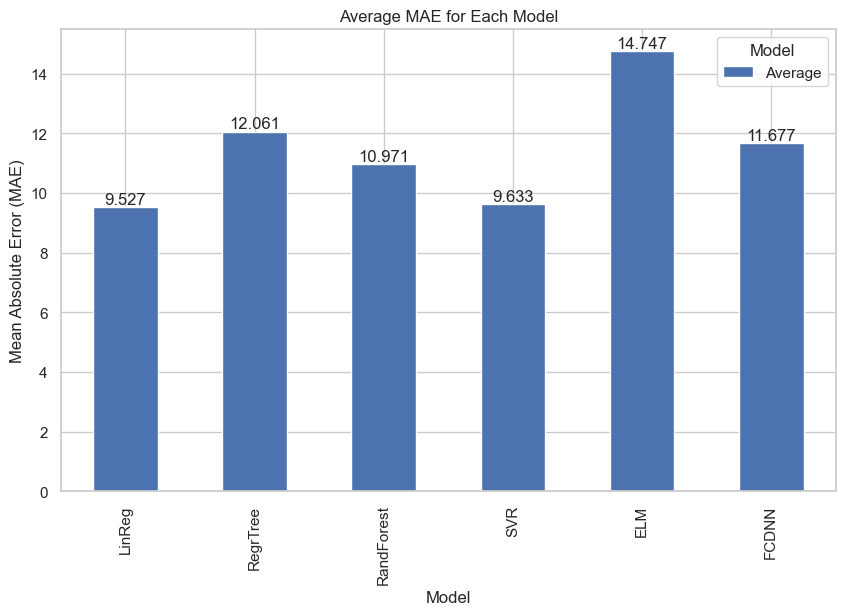

In [57]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.73, 9.32, 9.55, 9.62, 9.66, 9.83, 9.98]
mae_fcdnn = [10.23, 10.88, 12.11, 11.72, 12.19, 12.08, 12.53]
mae_svr = [8.73, 9.65, 9.67, 9.81, 9.80, 9.78, 9.99]
mae_rf = [10.94, 11.45, 11.27, 11.04, 10.60, 10.75, 10.75]
mae_rt = [11.06, 11.37, 12.80, 12.17, 12.25, 12.62, 12.16]
mae_elm = [14.35, 14.39, 14.64, 14.24, 15.53, 15.05, 15.03]

# Create a DataFrame
data = {
    'Days': days,
    'LinReg': mae_lr,
    'RegrTree': mae_rt,
    'RandFore': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Model': 'Average',
    'LinReg': round(sum(mae_lr) / len(mae_lr), 3),
    'RegrTree': round(sum(mae_rt) / len(mae_rt), 3),
    'RandForest': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)

# Plot the average values as a bar graph with annotations and legend
averages_df = pd.DataFrame([averages])
averages_df.set_index('Model', inplace=True)

ax = averages_df.T.plot(kind='bar', legend=True, figsize=(10, 6))
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xlabel('Model')
ax.set_title('Average MAE for Each Model')

# Add annotations for each bar
for idx, value in enumerate(averages_df.values.flatten()):
    ax.text(idx, value, str(value), ha='center', va='bottom')

# Display the bar graph
plt.show()
